In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.data.make_dataset import load_dossies_df
from src.data.make_metadados import load_dossies_metadados_df
from src.features.build_features import get_tfidf_features
from src.models import train_model, predict_model, validate_model
from src.visualization.visualize import plot_dendrogram_Agglomerative, plot_dendrogram

In [3]:
dossies = load_dossies_df()
len(dossies)

464

In [4]:
dossies.head()

,file,text
0,10.txt,produção limpa produção limpa construção civil...
1,100.txt,técnico curtimento rede tecnologia bahia abril...
2,101.txt,técnico instalação pomar rede tecnologia bahia...
3,102.txt,técnico produção carvalho rede tecnologia bahi...
4,103.txt,técnico viveiro rede tecnologia bahia abril té...


In [5]:
dossies_metadados = load_dossies_metadados_df(dossies.file, ['titulo', 'palavras_chave', 'categoria'])
len(dossies_metadados)

464

In [6]:
dossies_metadados.head()

,titulo,palavras_chave,categoria
0,Produção mais limpa no setor de construção civil,"[Aproveitamento de resíduo, construção civil,...","[SBRT, ÁGUA,ESGOTO,GESTÃO DE RESÍDUOS, Coleta ..."
1,Curtimento de peles exóticas – peixes e rãs,"[Curtimento, couro, pele, peixe, rã]","[SBRT, INDÚSTRIAS DE TRANSFORMAÇÃO, Couros e C..."
2,Instalação de pomar,"[Agricultura, pomar]","[SBRT, AGRICULTURA E PECUÁRIA, Agricultura, Ho..."
3,Produção de licores,"[Bebida Alcoólica, licor]","[SBRT, INDÚSTRIAS DE TRANSFORMAÇÃO, Alimentos ..."
4,Preparação de viveiro – povoamento com camarões,"[Camarão, carcinicultura, pesca, viveiro]","[SBRT, PESCA E AQUICULTURA, Pesca]"


In [7]:
X = get_tfidf_features(dossies.text)
X.shape

(464, 6361)

In [40]:
aggl_clustering = train_model.agglomerative(X, distance_threshold=0, n_clusters=None, linkage='ward')
aggl_clustering

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=0, linkage='ward',
                        memory=None, n_clusters=None)

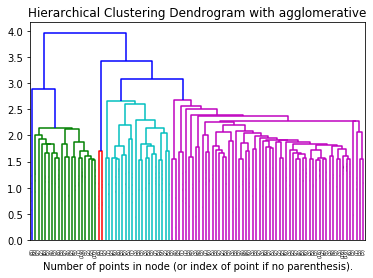

In [41]:
plot_dendrogram_Agglomerative(
    aggl_clustering,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=100,  # show only the last p merged clusters
    leaf_rotation=90,
    # leaf_font_size=12.,
    show_contracted=True    
)

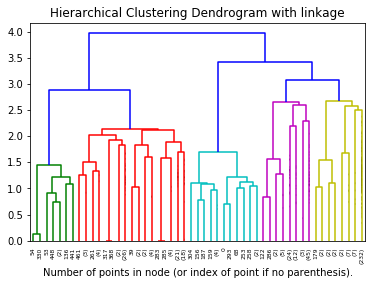

In [58]:
Z = train_model.linkage_matrix(X, method='ward')
plot_dendrogram(
    Z,
    truncate_mode='level',
    p=5,
    leaf_rotation=90,
    # leaf_font_size=12.,
    show_contracted=True
)

In [44]:
n_clusters = 5
labels = predict_model.Z_labels(Z, t=n_clusters, criterion='maxclust')
labels

array([3, 5, 2, 5, 2, 5, 2, 4, 5, 4, 5, 2, 4, 5, 2, 2, 5, 5, 5, 2, 4, 4,
       5, 2, 4, 4, 5, 5, 2, 5, 5, 2, 4, 2, 5, 5, 2, 5, 5, 2, 2, 5, 5, 5,
       5, 4, 5, 4, 4, 4, 2, 5, 5, 1, 1, 5, 2, 5, 2, 2, 5, 5, 5, 5, 5, 5,
       5, 5, 3, 5, 2, 5, 5, 5, 5, 4, 5, 5, 5, 4, 5, 5, 5, 5, 5, 2, 5, 5,
       5, 2, 5, 5, 2, 4, 5, 5, 2, 5, 2, 5, 5, 4, 5, 5, 2, 4, 5, 5, 4, 5,
       5, 5, 5, 4, 5, 2, 5, 5, 5, 5, 5, 2, 4, 4, 2, 5, 5, 2, 4, 2, 4, 5,
       4, 5, 5, 5, 1, 5, 5, 2, 5, 4, 2, 2, 2, 4, 2, 4, 2, 5, 2, 5, 5, 5,
       3, 5, 3, 3, 5, 3, 2, 4, 5, 4, 5, 2, 2, 2, 5, 2, 5, 5, 5, 4, 2, 5,
       5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 5, 5, 4, 4, 5, 5, 5, 4, 4,
       5, 5, 5, 2, 5, 4, 5, 2, 5, 2, 5, 5, 5, 5, 2, 5, 2, 4, 2, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 2, 5, 4, 4, 5, 4, 5, 5,
       5, 5, 5, 4, 4, 4, 4, 5, 4, 4, 5, 3, 5, 4, 2, 4, 3, 2, 5, 2, 4, 5,
       5, 5, 5, 5, 5, 5, 2, 5, 4, 2, 5, 4, 5, 4, 4, 4, 5, 2, 2, 2, 2, 2,
       4, 5, 1, 4, 5, 4, 5, 3, 5, 2, 5, 2, 2, 5, 5,

In [47]:
# Com os resultados dessa célula pode-se presumir que documentos com a label 2 está fortemente relacionado à questões de agricultura
cluster_2 = validate_model.checar_categoria(dossies_metadados, labels, 2)
cluster_2.info()
print(cluster_2.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 2 to 461
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   titulo     93 non-null     object
 1   categoria  93 non-null     object
dtypes: object(2)
memory usage: 2.2+ KB
                                               titulo  \
2                                 Instalação de pomar   
4     Preparação de viveiro – povoamento com camarões   
6   Produção de mudas frutíferas de cítros e manga...   
11                                     Adubação verde   
14                                 Cultivo de Algodão   

                                            categoria  
2   [SBRT, AGRICULTURA E PECUÁRIA, Agricultura, Ho...  
4                  [SBRT, PESCA E AQUICULTURA, Pesca]  
6   [SBRT, AGRICULTURA E PECUÁRIA, Agricultura, Fr...  
11  [SBRT, AGRICULTURA E PECUÁRIA, Agricultura, At...  
14  [SBRT, AGRICULTURA E PECUÁRIA, Agricultura, Fr...  


In [48]:
validate_model.checar_substring(cluster_2, 'titulo', 'cultivo')

,titulo,categoria
14,Cultivo de Algodão,"[SBRT, AGRICULTURA E PECUÁRIA, Agricultura, Fr..."
15,Cultivo do Café Orgânico,"[SBRT, AGRICULTURA E PECUÁRIA, Agricultura, Ou..."
23,Cultivo de goiaba,"[SBRT, AGRICULTURA E PECUÁRIA, Agricultura, Fr..."
28,Cultivo e processamento de pimenta,"[SBRT, AGRICULTURA E PECUÁRIA, Agricultura, Ho..."
36,Cultivo da Ameixa,"[SBRT, AGRICULTURA E PECUÁRIA, Agricultura, Fr..."
40,Cultivo de Bonsai,"[SBRT, AGRICULTURA E PECUÁRIA, Agricultura, Fl..."
58,Cultivo do Morango,"[SBRT, AGRICULTURA E PECUÁRIA, Agricultura, Ho..."
59,Cultivo de rosas de corte em ambiente protegid...,"[SBRT, AGRICULTURA E PECUÁRIA, Agricultura, Fl..."
115,Cultivo de Laranja,"[SBRT, AGRICULTURA E PECUÁRIA, Agricultura, Fr..."
121,Cultivo da castanha-do-Brasil,"[SBRT, PRODUÇÃO FLORESTAL, Florestas Nativas]"


In [51]:
# Com os resultados dessa célula pode-se presumir que documentos com a label 1 está fortemente relacionado à questões de agricultura
cluster_1 = validate_model.checar_categoria(dossies_metadados, labels, 1)
cluster_1.head()

,titulo,categoria
53,Colheita e processamento de cogumelos comestív...,"[SBRT, AGRICULTURA E PECUÁRIA, Agricultura, Ho..."
54,Controle de contaminações em processos de cult...,"[SBRT, AGRICULTURA E PECUÁRIA, Agricultura, Fr..."
136,Preparo de extratos de cogumelos medicinais,"[SBRT, INDÚSTRIAS DE TRANSFORMAÇÃO, Produtos F..."
288,Cultivo do “Cogumelo do Sol”,"[SBRT, AGRICULTURA E PECUÁRIA, Agricultura, Ho..."
330,Controle de contaminações em processos de cult...,"[SBRT, AGRICULTURA E PECUÁRIA, Agricultura, At..."


In [57]:
validate_model.checar_substring(cluster_1, 'titulo', r'cogumelos?')

,titulo,categoria
53,Colheita e processamento de cogumelos comestív...,"[SBRT, AGRICULTURA E PECUÁRIA, Agricultura, Ho..."
54,Controle de contaminações em processos de cult...,"[SBRT, AGRICULTURA E PECUÁRIA, Agricultura, Fr..."
136,Preparo de extratos de cogumelos medicinais,"[SBRT, INDÚSTRIAS DE TRANSFORMAÇÃO, Produtos F..."
288,Cultivo do “Cogumelo do Sol”,"[SBRT, AGRICULTURA E PECUÁRIA, Agricultura, Ho..."
330,Controle de contaminações em processos de cult...,"[SBRT, AGRICULTURA E PECUÁRIA, Agricultura, At..."
441,Produção de “semente” de cogumelos comestíveis...,"[SBRT, AGRICULTURA E PECUÁRIA, Agricultura, Ho..."
445,Cultivo de cogumelos comestíveis,"[SBRT, AGRICULTURA E PECUÁRIA, Agricultura, Ho..."
448,Técnicas avançadas de cultivo tradicional e or...,"[SBRT, AGRICULTURA E PECUÁRIA, Agricultura, Ho..."
